In [37]:
import numpy as np
try:
  from empiricaldist import Pmf
except:
  !pip install empiricaldist
import matplotlib.pyplot as plt

In [38]:
def decorate(xlabel=None,ylabel=None,title=None, legend=[]):
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend(legend)
  return plt.show()

> **5-1 Exercise:** 

  Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.

  You think there are fewer then 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:

  * You ask how many people were born on May 11 and two people raise their hands.

  * You ask how many were born on May 23 and 1 person raises their hand.

  * Finally, you ask how many were born on August 1, and no one raises their hand.

  How many people are in the audience? What is the probability that there are more than 1200 people. Hint: Remember the binomial distribution.

In [42]:
hypos51 = np.arange(1, 2000, 10)
prior51 = Pmf(1, hypos51)
prior51.normalize()
prior51

,probs
1,0.005
11,0.005
21,0.005
31,0.005
41,0.005
...,...
1951,0.005
1961,0.005
1971,0.005
1981,0.005


In [62]:
from scipy.stats import binom

likelihood51_1 = binom.pmf(2, hypos51, 1/365)
likelihood51_2 = binom.pmf(1, hypos51, 1/365)
likelihood51_3 = binom.pmf(0, hypos51, 1/365)

In [63]:
posterior51 = prior51 * likelihood51_1 * likelihood51_2 * likelihood51_3
posterior51.normalize()

0.006758799800451805

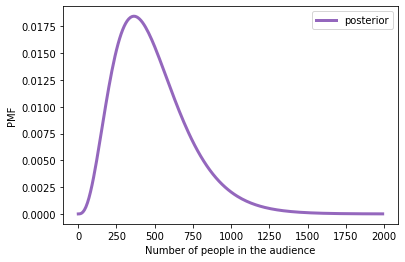

In [64]:
posterior51.plot(color='C4', label='posterior',linewidth=3.0)
decorate(xlabel='Number of people in the audience',
         ylabel='PMF',
         legend=['posterior'])

In [65]:
posterior51.mean()

486.2255161687084

In [66]:
posterior51.prob_gt(1200)

0.011543092507699223

>**Exercise 5-2:**

  I often see rabbits in the garden behind my house, but it’s not easy to tell them apart, so I don’t really know how many there are.

  Suppose I deploy a motion-sensing camera trap that takes a picture of the first rabbit it sees each day. After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different.

  How many rabbits visit my garden?

  To answer this question, we have to think about the prior distribution and the likelihood of the data:

  * I have sometimes seen four rabbits at the same time, so I know there are at least that many. I would be surprised if there were more than 10. So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.

  * To keep things simple, let’s assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let’s also assume it is guaranteed that the camera trap gets a picture every day.


In [46]:
hypos52 = np.arange(4, 11)
prior52 = Pmf(1, hypos52)
prior52

,probs
4,1
5,1
6,1
7,1
8,1
9,1
10,1


In [47]:
# The probability that the second rabbit is the same as the first is 1/N
# The probability that the third rabbit is different is (N-1)/N

N = hypos52
likelihood52 = (N-1) / N**2

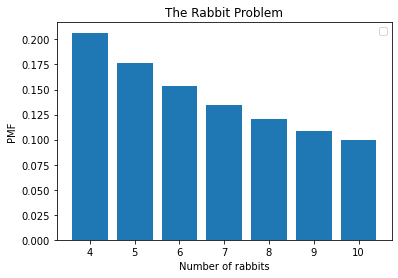

In [48]:
posterior52 = prior52 * likelihood52
posterior52.normalize()

posterior52.bar(alpha=1.0)
decorate(xlabel='Number of rabbits',
         ylabel='PMF',
         title='The Rabbit Problem')

> **Exercise 5-3:** Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each. One day, you visit a prison and choose a prisoner at random. What is the probability that they are serving a 3-year sentence? What is the average remaining sentence of the prisoners you observe?

In [49]:
hypos53=np.arange(1,4)
prior53= Pmf(1/3,hypos53)
prior53

,probs
1,0.333333
2,0.333333
3,0.333333


In [50]:
likelihood53 = hypos53
posterior53 = prior53 * likelihood53
posterior53.normalize()
posterior53

,probs
1,0.166667
2,0.333333
3,0.500000


In [51]:
# The mean of the posterior is the average sentence.
# We can divide by 2 to get the average remaining sentence.
posterior53.mean() / 2

1.1666666666666665

> **Exercise 5-4:** 

The [Doomsday argument](https://en.wikipedia.org/wiki/Doomsday_argument) is “a probabilistic argument that claims to predict the number of future members of the human species given an estimate of the total number of humans born so far.”

  Suppose there are only two kinds of intelligent civilizations that can happen in the universe. The “short-lived” kind go exinct after only 200 billion individuals are born. The “long-lived” kind survive until 2,000 billion individuals are born. And suppose that the two kinds of civilization are equally likely. Which kind of civilization do you think we live in?

  The Doomsday argument says we can use the total number of humans born so far as data. According to the [Population Reference Bureau](https://www.prb.org/howmanypeoplehaveeverlivedonearth/), the total number of people who have ever lived is about 108 billion.

  Since you were born quite recently, let’s assume that you are, in fact, human being number 108 billion. If $N$ is the total number who will ever live and we consider you to be a randomly-chosen person, it is equally likely that you could have been person 1, or $N$, or any number in between. So what is the probability that you would be number 108 billion?

  Given this data and dubious prior, what is the probability that our civilization will be short-lived?

In [53]:
hypos54 = [200, 2000]
prior54 = Pmf(1, hypos54)
prior54

,probs
200,1
2000,1


In [54]:
likelihood54 = 1/prior54.qs
posterior54 = prior54 * likelihood54
posterior54.normalize()
posterior54

,probs
200,0.909091
2000,0.090909
